In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error

import auxiliaries as aux

## Setup

In [2]:
# Develop window for data separation
species = 'Deer'
file_name = 'GSM02927'

years_to_predict = 1
time_intervals = 3 if species == 'Moose' else 4

future_window = aux.FuturePredictionWindow(species, file_name)
past_window = aux.PastPredictionWindow(species, file_name)

results = {}

print('------Original Regressive Window------')
print(f'Original Data Size: {len(future_window.orig_df)}')
print(f'Training Data Size: {len(future_window.train_df)}')
print(f'Testing Data Size: {len(future_window.test_df)}\n')

print(f'Training Mean:\n{future_window.train_df.mean()}')
print(f'Training Std. Dev.:\n{future_window.train_df.std()}\n')

print('------Reversed Regressive Window------')
print(f'Original Data Size: {len(past_window.orig_df)}')
print(f'Training Data Size: {len(past_window.train_df)}')
print(f'Testing Data Size: {len(past_window.test_df)}\n')

print(f'Training Mean:\n{past_window.train_df.mean()}')
print(f'Training Std. Dev.:\n{past_window.train_df.std()}\n')

------Original Regressive Window------
Original Data Size: 2923
Training Data Size: 2046
Testing Data Size: 877

Training Mean:
external-temperature     9.972483
longitude               11.031551
latitude                46.008411
month                    6.251222
day                     15.697458
dtype: float64
Training Std. Dev.:
external-temperature    17.419473
longitude                0.021036
latitude                 0.002235
month                    3.396595
day                      8.695606
dtype: float64

------Reversed Regressive Window------
Original Data Size: 2923
Training Data Size: 2046
Testing Data Size: 877

Training Mean:
external-temperature     9.490762
longitude               11.036021
latitude                46.008706
month                    6.727273
day                     15.601173
dtype: float64
Training Std. Dev.:
external-temperature    17.726893
longitude                0.018820
latitude                 0.002072
month                    3.458438
day         

### Future-Prediction Regressive Model

In [3]:
future_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=(1,3), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

future_window.model_compilation_and_fitting(future_model)

Epoch 1/20


c:\Users\Imper\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7546 - mean_absolute_error: 0.7155 - mean_squared_error: 0.7546
Epoch 2/20
50/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5930 - mean_absolute_error: 0.5750 - mean_squared_error: 0.5930

c:\Users\Imper\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error,mean_squared_error
  current = self.get_monitor_value(logs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5842 - mean_absolute_error: 0.5693 - mean_squared_error: 0.5842
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5527 - mean_absolute_error: 0.5445 - mean_squared_error: 0.5527
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5273 - mean_absolute_error: 0.5204 - mean_squared_error: 0.5273
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4947 - mean_absolute_error: 0.5007 - mean_squared_error: 0.4947
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4986 - mean_absolute_error: 0.4941 - mean_squared_error: 0.4986
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4719 - mean_absolute_error: 0.4832 - mean_squared_error: 0.4719
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4675 - mean_absolute_error: 0.4792 - mean_squared_error: 0.4675
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4298 - mean_absolute_error: 0.4547 - mean_squared_error: 0.4298
Epoch 10/20
64/64 ━

In [4]:
results['Future-Prediction Regressive Model'] = future_model.evaluate(future_window.test_input, future_window.test_label, verbose=1, return_dict=True)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 1.0311 - mean_absolute_error: 0.7013 - mean_squared_error: 1.0311


In [5]:
# Generate CSV file analyzing testing set results
def graph_regressive(model, window, url_dest):
    test_df = window.test_df
    test_df['timestamp'] = window.timeline[int(len(window.orig_df)*0.7):]

    initial_df = test_df[['timestamp', 'month', 'day', 'external-temperature', 'longitude', 'latitude']]
    initial_df['id'] = ['original' for _ in range(len(initial_df))]

    data = {
        'timestamp': [],
        'month': [],
        'day': [],
        'external-temperature': [],
        'longitude': [],
        'latitude': [],
        'id': []
    }

    for i in range(len(initial_df)):
        section = initial_df.iloc[i]

        timestamp = section['timestamp']
        month = (section['month'] - window.train_df['month'].mean())/window.train_df['month'].std()
        day = (section['day'] - window.train_df['day'].mean())/window.train_df['day'].std()
        external_temp = (section['external-temperature'] - window.train_df['external-temperature'].mean())/window.train_df['external-temperature'].std()

        if isinstance(model, tf.keras.Sequential):
            output_fields = model(np.array([external_temp, month, day]).reshape([1, 1, 3])).numpy()*window.train_df[['longitude', 'latitude']].std().values + window.train_df[['longitude', 'latitude']].mean().values
            output_fields = output_fields[0][0]
        elif isinstance(model, sklearn.neighbors.KNeighborsRegressor):
            output_fields = model.predict([[external_temp, month, day]])[0]*window.train_df[['longitude', 'latitude']].std() + window.train_df[['longitude', 'latitude']].mean()
            output_fields = output_fields.values

        longitude = output_fields[0]
        latitude = output_fields[1]
        id = 'predicted'

        data['timestamp'].append(timestamp)
        data['month'].append(section['month'])
        data['day'].append(section['day'])
        data['external-temperature'].append(section['external-temperature'])
        data['longitude'].append(longitude)
        data['latitude'].append(latitude)
        data['id'].append(id)

    add_on_df = pd.DataFrame(data)
    
    full_df = pd.concat([initial_df, add_on_df], ignore_index=True)
    full_df.to_csv(url_dest, index=False)

    return full_df

future_test_results_df = graph_regressive(future_model, future_window, f'CSVFiles/TestPerformanceCSV/TestPredictions/{species}/{file_name}_futureprediction_testpredictions.csv')

C:\Users\Imper\AppData\Local\Temp\ipykernel_37080\3640269440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['timestamp'] = window.timeline[int(len(window.orig_df)*0.7):]
C:\Users\Imper\AppData\Local\Temp\ipykernel_37080\3640269440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  initial_df['id'] = ['original' for _ in range(len(initial_df))]


In [6]:
future_test_results_df

,timestamp,month,day,external-temperature,longitude,latitude,id
0,2007-10-19 16:02:55,10,19,-0.6,11.047242,46.010533,original
1,2007-10-19 20:01:47,10,19,-3.6,11.048442,46.008974,original
2,2007-10-20 00:01:11,10,20,11.4,11.047115,46.009779,original
3,2007-10-20 04:00:55,10,20,-7.3,11.048017,46.008876,original
4,2007-10-20 08:00:55,10,20,-8.0,11.046749,46.009134,original
...,...,...,...,...,...,...,...
1749,2008-03-14 16:00:54,3,14,4.4,11.045395,46.009424,predicted
1750,2008-03-14 20:01:53,3,14,4.7,11.045039,46.009327,predicted
1751,2008-03-15 00:03:05,3,15,3.8,11.040317,46.008942,predicted
1752,2008-03-15 04:02:21,3,15,1.0,11.041634,46.009546,predicted


In [7]:
important_columns = set(future_test_results_df.columns)
important_columns.remove('timestamp')
important_columns.remove('id')

normed_future_test_results_df = future_test_results_df.copy(deep=True)
normed_future_test_results_df[list(important_columns)] = (future_test_results_df[list(important_columns)] - future_window.train_df[list(important_columns)].mean())/future_window.train_df[list(important_columns)].std()
normed_future_test_results_df

,timestamp,month,day,external-temperature,longitude,latitude,id
0,2007-10-19 16:02:55,1.103687,0.379794,-0.606935,0.745921,0.949381,original
1,2007-10-19 20:01:47,1.103687,0.379794,-0.779156,0.802952,0.251817,original
2,2007-10-20 00:01:11,1.103687,0.494795,0.081950,0.739851,0.611964,original
3,2007-10-20 04:00:55,1.103687,0.494795,-0.991562,0.782739,0.207699,original
4,2007-10-20 08:00:55,1.103687,0.494795,-1.031747,0.722471,0.323497,original
...,...,...,...,...,...,...,...
1749,2008-03-14 16:00:54,-0.957200,-0.195209,-0.319900,0.658094,0.453281,predicted
1750,2008-03-14 20:01:53,-0.957200,-0.195209,-0.302678,0.641170,0.409781,predicted
1751,2008-03-15 00:03:05,-0.957200,-0.080208,-0.354344,0.416700,0.237450,predicted
1752,2008-03-15 04:02:21,-0.957200,-0.080208,-0.515084,0.479314,0.507774,predicted


In [8]:
# Defining Input and Output Labels
input_columns = ['month', 'day', 'external-temperature']
output_columns = ['longitude', 'latitude']

# Input ordering
future_original_output = normed_future_test_results_df[normed_future_test_results_df.id == 'original'][output_columns].values
future_original_output = future_original_output.reshape((future_original_output.shape[0], future_original_output.shape[-1]))
future_predicted_output = normed_future_test_results_df[normed_future_test_results_df.id == 'predicted'][output_columns].values
future_predicted_output = future_predicted_output.reshape((future_predicted_output.shape[0], future_predicted_output.shape[-1]))

# Statistics gathering
mae_values = list(mean_absolute_error(future_original_output, future_predicted_output, multioutput='raw_values'))
mae_values = {coord_name: coord_value for coord_name, coord_value in zip(['mae_longitude', 'mae_latitude'], mae_values)}

mse_values = list(mean_squared_error(future_original_output, future_predicted_output, multioutput='raw_values'))
mse_values = {coord_name: coord_value for coord_name, coord_value in zip(['mse_longitude', 'mse_latitude'], mse_values)}

# Apply statistics to results
results['Future-Prediction Regressive Model'].update(mae_values)
results['Future-Prediction Regressive Model'].update(mse_values)

In [9]:
results['Future-Prediction Regressive Model']

{'loss': 0.9416094422340393,
 'mean_absolute_error': 0.670155942440033,
 'mean_squared_error': 0.9416094422340393,
 'mae_longitude': 0.6570479783950133,
 'mae_latitude': 0.6832637158792875,
 'mse_longitude': 1.1379402448617189,
 'mse_latitude': 0.7452785722504315}

In [10]:
# Histogram for Distance Errors
future_distances = []
unnormed_future_original_output = future_test_results_df[future_test_results_df['id'] == 'original'][output_columns].values
unnormed_future_predicted_output = future_test_results_df[future_test_results_df['id'] == 'predicted'][output_columns].values

r = 3958.756 # Average volumetric radius of Earth
for original_coord, predicted_coord in zip(unnormed_future_original_output, unnormed_future_predicted_output):
    curr_d = 2*r*math.asin(
        math.sqrt(
            ((1-math.cos(math.radians(predicted_coord[1] - original_coord[1]))) 
             + math.cos(math.radians(predicted_coord[1]))*math.cos(math.radians(original_coord[1]))*(1-math.cos(math.radians(predicted_coord[0] - original_coord[0]))))/2))
    future_distances.append(curr_d)

future_distance_df = pd.DataFrame({'Distances': future_distances, 'Timestamp': future_test_results_df[future_test_results_df.id == 'original']['timestamp']})
future_distance_df['Timestamp'] = pd.DatetimeIndex(future_distance_df['Timestamp'])

In [11]:
hist, bins = np.histogram(future_distances, bins=12, range=(0, 3), density=True)

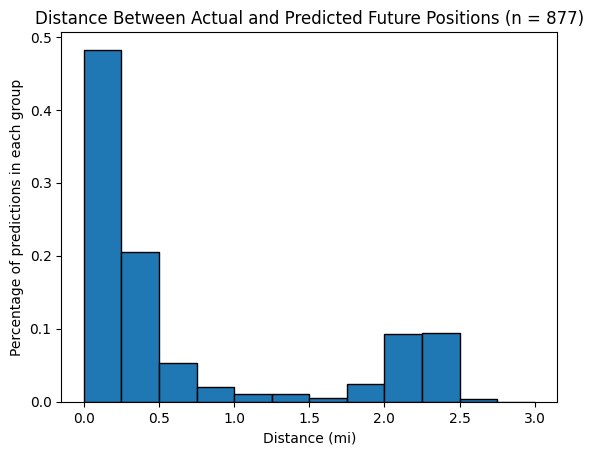

In [12]:
# Histogram of future_distances
con = plt.bar(bins[0:len(bins) - 1] + 0.125, hist*0.25, edgecolor='black', width=0.25)
plt.title(f"Distance Between Actual and Predicted Future Positions (n = {len(future_distances)})")
plt.xlabel("Distance (mi)")
plt.ylabel("Percentage of predictions in each group")
plt.show()

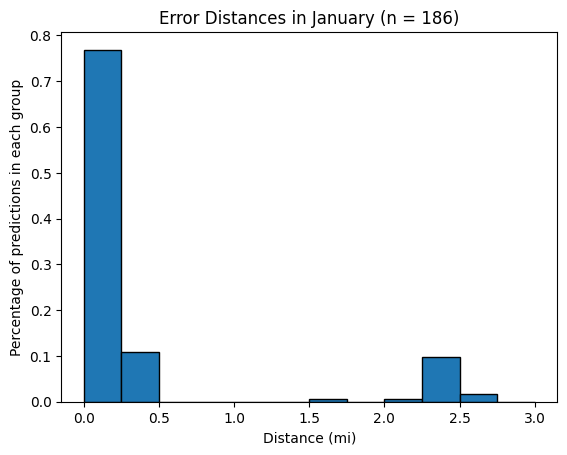

In [13]:
month = 'January'
month_to_date = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

hist, bins = np.histogram(future_distance_df[future_distance_df['Timestamp'].dt.month == month_to_date[month]]['Distances'].values, bins=12, range=(0, 3), density=True)

# Histogram of future_distances by month
con = plt.bar(bins[0:len(bins) - 1] + 0.125, hist*0.25, edgecolor='black', width=0.25)
plt.title(f"Error Distances in {month} (n = {len(future_distance_df[future_distance_df['Timestamp'].dt.month == month_to_date[month]]['Distances'].values)})")
plt.xlabel("Distance (mi)")
plt.ylabel("Percentage of predictions in each group")
plt.show()

In [14]:
future_window.csv_extension(f'{species}/{file_name}_futureprediction', species, future_model)

In [15]:
future_model.save(f'ModelFiles/{species}/{file_name}_futureprediction.keras')

### Past-Prediction Regressive

In [16]:
past_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=(1,3), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

past_window.model_compilation_and_fitting(past_model)

Epoch 1/20


c:\Users\Imper\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8054 - mean_absolute_error: 0.6860 - mean_squared_error: 0.8054
Epoch 2/20
33/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5704 - mean_absolute_error: 0.5412 - mean_squared_error: 0.5704

c:\Users\Imper\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error,mean_squared_error
  current = self.get_monitor_value(logs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5755 - mean_absolute_error: 0.5397 - mean_squared_error: 0.5755
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5671 - mean_absolute_error: 0.5308 - mean_squared_error: 0.5671
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5888 - mean_absolute_error: 0.5323 - mean_squared_error: 0.5888
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5563 - mean_absolute_error: 0.5119 - mean_squared_error: 0.5563
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5441 - mean_absolute_error: 0.5063 - mean_squared_error: 0.5441
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5508 - mean_absolute_error: 0.5095 - mean_squared_error: 0.5508
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5194 - mean_absolute_error: 0.4964 - mean_squared_error: 0.5194
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5546 - mean_absolute_error: 0.5110 - mean_squared_error: 0.5546
Epoch 10/20
64/64 ━

In [17]:
results['Past-Prediction Regressive Model'] = past_model.evaluate(past_window.test_input, past_window.test_label, verbose=1, return_dict=True)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9447 - mean_absolute_error: 0.7436 - mean_squared_error: 0.9447  


In [18]:
past_test_results_df = graph_regressive(past_model, past_window, f'CSVFiles/TestPerformanceCSV/TestPredictions/{species}/{file_name}_pastprediction_testpredictions.csv')

C:\Users\Imper\AppData\Local\Temp\ipykernel_37080\3640269440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['timestamp'] = window.timeline[int(len(window.orig_df)*0.7):]
C:\Users\Imper\AppData\Local\Temp\ipykernel_37080\3640269440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  initial_df['id'] = ['original' for _ in range(len(initial_df))]


In [19]:
past_test_results_df

,timestamp,month,day,external-temperature,longitude,latitude,id
0,2007-04-07 16:00:50,4,7,5.7,11.048319,46.010373,original
1,2007-04-07 12:01:42,4,7,5.0,11.048023,46.012476,original
2,2007-04-07 08:03:09,4,7,2.6,11.047479,46.011052,original
3,2007-04-07 04:00:53,4,7,2.6,11.046926,46.009605,original
4,2007-04-07 00:00:54,4,7,3.4,11.046919,46.010993,original
...,...,...,...,...,...,...,...
1749,2006-11-13 04:01:23,11,13,-4.2,11.046125,46.009799,predicted
1750,2006-11-13 00:02:24,11,13,-3.5,11.046124,46.009803,predicted
1751,2006-11-12 20:03:04,11,12,0.0,11.046423,46.009878,predicted
1752,2006-11-12 16:03:04,11,12,2.6,11.046201,46.009778,predicted


In [20]:
important_columns = set(past_test_results_df.columns)
important_columns.remove('timestamp')
important_columns.remove('id')

normed_past_test_results_df = past_test_results_df.copy(deep=True)
normed_past_test_results_df[list(important_columns)] = (past_test_results_df[list(important_columns)] - past_test_results_df[list(important_columns)].mean())/past_test_results_df[list(important_columns)].std()
normed_past_test_results_df

,timestamp,month,day,external-temperature,longitude,latitude,id
0,2007-04-07 16:00:50,-0.296204,-1.000470,1.574740,1.617656,1.252574,original
1,2007-04-07 12:01:42,-0.296204,-1.000470,1.396402,1.602711,2.598669,original
2,2007-04-07 08:03:09,-0.296204,-1.000470,0.784959,1.575222,1.686825,original
3,2007-04-07 04:00:53,-0.296204,-1.000470,0.784959,1.547305,0.760774,original
4,2007-04-07 00:00:54,-0.296204,-1.000470,0.988773,1.546972,1.649316,original
...,...,...,...,...,...,...,...
1749,2006-11-13 04:01:23,1.237012,-0.320218,-0.947464,1.506897,0.884904,predicted
1750,2006-11-13 00:02:24,1.237012,-0.320218,-0.769126,1.506813,0.887821,predicted
1751,2006-11-12 20:03:04,1.237012,-0.433593,0.122562,1.521933,0.935377,predicted
1752,2006-11-12 16:03:04,1.237012,-0.433593,0.784959,1.510722,0.871636,predicted


In [21]:
# Defining Input and Output Labels
input_columns = ['month', 'day', 'external-temperature']
output_columns = ['longitude', 'latitude']

# Input ordering
past_original_output = normed_past_test_results_df[normed_past_test_results_df.id == 'original'][output_columns].values
past_original_output = past_original_output.reshape((past_original_output.shape[0], past_original_output.shape[-1]))
past_predicted_output = normed_past_test_results_df[normed_past_test_results_df.id == 'predicted'][output_columns].values
past_predicted_output = past_predicted_output.reshape((past_predicted_output.shape[0], past_predicted_output.shape[-1]))

# Statistics gathering
mae_values = list(mean_absolute_error(past_original_output, past_predicted_output, multioutput='raw_values'))
mae_values = {coord_name: coord_value for coord_name, coord_value in zip(['mae_longitude', 'mae_latitude'], mae_values)}

mse_values = list(mean_squared_error(past_original_output, past_predicted_output, multioutput='raw_values'))
mse_values = {coord_name: coord_value for coord_name, coord_value in zip(['mse_longitude', 'mse_latitude'], mse_values)}

# Apply statistics to results
results['Past-Prediction Regressive Model'].update(mae_values)
results['Past-Prediction Regressive Model'].update(mse_values)

In [22]:
results['Past-Prediction Regressive Model']

{'loss': 1.0937927961349487,
 'mean_absolute_error': 0.7600339651107788,
 'mean_squared_error': 1.0937927961349487,
 'mae_longitude': 0.6823927561380604,
 'mae_latitude': 1.063529422403214,
 'mse_longitude': 1.1212919289910381,
 'mse_latitude': 1.6633304951238157}

In [23]:
# Histogram for Distance Errors
past_distances = []
unnormed_past_original_output = past_test_results_df[past_test_results_df['id'] == 'original'][output_columns].values
unnormed_past_predicted_output = past_test_results_df[past_test_results_df['id'] == 'predicted'][output_columns].values

r = 3958.756 # Average volumetric radius of Earth
for original_coord, predicted_coord in zip(unnormed_past_original_output, unnormed_past_predicted_output):
    curr_d = 2*r*math.asin(
        math.sqrt(
            ((1-math.cos(math.radians(predicted_coord[1] - original_coord[1]))) 
             + math.cos(math.radians(predicted_coord[1]))*math.cos(math.radians(original_coord[1]))*(1-math.cos(math.radians(predicted_coord[0] - original_coord[0]))))/2))
    past_distances.append(curr_d)

past_distance_df = pd.DataFrame({'Distances': past_distances, 'Timestamp': past_test_results_df[past_test_results_df.id == 'original']['timestamp']})
past_distance_df['Timestamp'] = pd.DatetimeIndex(past_distance_df['Timestamp'])

In [24]:
hist, bins = np.histogram(past_distances, bins=12, range=(0,3), density=True)

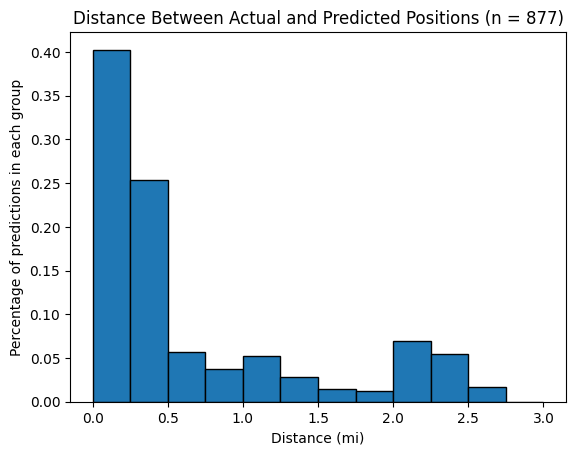

In [25]:
# Histogram of distances
con = plt.bar(bins[0:len(bins) - 1] + 0.125, hist*0.25, edgecolor='black', width=0.25)
plt.title(f"Distance Between Actual and Predicted Positions (n = {len(past_distances)})")
plt.xlabel("Distance (mi)")
plt.ylabel("Percentage of predictions in each group")
plt.show()

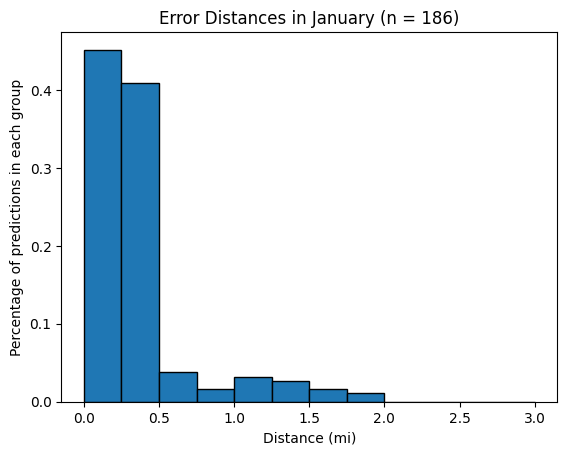

In [26]:
month = 'January'
month_to_date = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

hist, bins = np.histogram(past_distance_df[past_distance_df['Timestamp'].dt.month == month_to_date[month]]['Distances'].values, bins=12, range=(0, 3), density=True)

# Histogram of distances
con = plt.bar(bins[0:len(bins) - 1] + 0.125, hist*0.25, edgecolor='black', width=0.25)
plt.title(f"Error Distances in {month} (n = {len(past_distance_df[past_distance_df['Timestamp'].dt.month == month_to_date[month]]['Distances'].values)})")
plt.xlabel("Distance (mi)")
plt.ylabel("Percentage of predictions in each group")
plt.show()

In [27]:
past_window.csv_extension(f'{species}/{file_name}_pastprediction', species, past_model)

In [28]:
past_model.save(f'ModelFiles/{species}/{file_name}_pastprediction.keras')

### Final Results

In [29]:
results_df = pd.DataFrame(results).T
results_df.to_csv(f'CSVFiles/TestPerformanceCSV/TestMetrics/{species}/{file_name}_testmetrics_2.csv', index_label='Model_Name')
results_df

,loss,mean_absolute_error,mean_squared_error,mae_longitude,mae_latitude,mse_longitude,mse_latitude
Future-Prediction Regressive Model,0.941609,0.670156,0.941609,0.657048,0.683264,1.137940,0.745279
Past-Prediction Regressive Model,1.093793,0.760034,1.093793,0.682393,1.063529,1.121292,1.663330
